In [14]:
#KNN分类算法
import pandas as pd
import math

df=pd.read_excel('/Users/打乱的iris数据集.xlsx')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 将数据集划分为训练集和测试集
train_size = int(0.6 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print('Train_size:',train_size)
print('Test_size:',len(df)-train_size)

Train_size: 90
Test_size: 60


In [48]:
# 定义距离函数
#欧式距离
def E_distance(instance1, instance2):
    distance = 0
    for i in range(len(instance1)):
        distance += (instance1[i] - instance2[i]) ** 2
    return math.sqrt(distance)

#曼哈顿距离
def M_distance(instance1,instance2):
    distance=0
    for i in range(len(instance1)):
        distance+=abs(instance1[i]-instance2[i])
    return distance

# 定义 KNN 算法
def knn_predict(X_train, y_train, X_test_instance, k):
    distances = []
    for i in range(len(X_train)):
        dist = E_distance(X_train[i], X_test_instance)
        #dist=M_distance(X_train[i],X_test_instance)
        distances.append((y_train[i], dist))#增加第i个点的分类和距离
    distances.sort(key=lambda x: x[1])#按照dist距离升序排序
    neighbors = distances[:k]#选择前k个点，即：最近的k个邻居点
    
    class_num = {}
    for neighbor in neighbors:
        response = neighbor[0]
        if response in class_num:
            class_num[response] += 1
        else:
            class_num[response] = 1
            
    sorted_num = sorted(class_num.items(), key=lambda x: x[1], reverse=True)#降序，选择class_num中
    return sorted_num[0][0]


In [49]:
# 进行预测
k = 3
y_pred = []
for instance in X_test:
    result = knn_predict(X_train, y_train,instance, k)
    y_pred.append(result)

# 定义准确率
def accuracy_score(y_true, y_pred):
    correct = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            correct += 1
    return correct / float(len(y_true))

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Predicted labels:', y_pred)
print('True labels:', y_test.tolist())

Accuracy: 0.9666666666666667
Predicted labels: [2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0]
True labels: [2, 0, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0]


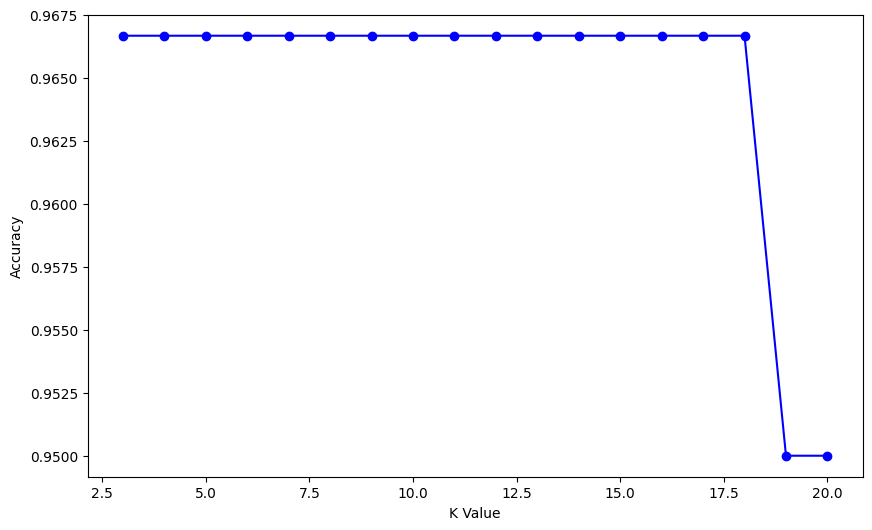

In [50]:
#进行k的交叉验证
k_values=range(3,21)
accuracies=[]

for k in k_values:
    y_pred=[]
    for instance in X_test:
        result=knn_predict(X_train,y_train,instance,k)
        y_pred.append(result)
    accuracy=accuracy_score(y_test,y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10,6))
plt.plot(k_values,accuracies,marker='o',linestyle='-',color='b')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()